In [3]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import xlrd
import html5lib
from datetime import datetime as dt
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df_list = pd.read_html('./ibovdata/ibovespa.xls')
df_ibovespa = pd.DataFrame(df_list[0])

ImportError: lxml not found, please install it

In [204]:
df_ibovespa.head()

,Code,Stock,Type,Theoretical Quantity,Part. (%)
0,ABEV3,AMBEV S/A,ON,4.347502e+09,4.975
1,B3SA3,B3,ON NM,2.044216e+09,4.126
2,BBAS3,BRASIL,ON NM,1.331530e+09,4.385
3,BBDC3,BRADESCO,ON EJ N1,6.672875e+08,1.677
4,BBDC4,BRADESCO,PN EJ N1,3.147257e+09,8.887


In [205]:
df_ibovespa.tail()

,Code,Stock,Type,Theoretical Quantity,Part. (%)
62,VIVT4,TELEF BRASIL,PN,4.151319e+08,1.291
63,VVAR3,VIAVAREJO,ON NM,4.040583e+08,0.153
64,WEGE3,WEG,ON NM,7.404533e+08,0.918
65,Total Theoretical Quantity,NaN,NaN,5.660743e+10,100.000
66,Reductor,NaN,NaN,1.617034e+07,NaN


In [206]:
codes_column = df_ibovespa['Code'].tolist()

In [207]:
codes = codes_column[:-2]
codes[:5]

['ABEV3', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4']

In [208]:
# Replace tickers with 11 end with 3 end

tickers = []

for code in codes:
    if code[-2:] == '11':
        code = code[:-2] + '3'
    tickers.append(code)

In [209]:
dt.now().strftime('%Y-%m-%d')

'2019-02-05'

In [226]:
def create_dataframe(tickers, start_date, end_date=dt.now().strftime('%Y-%m-%d'), bar='Adj Close', freq='B'):
    index = pd.date_range(start=start_date, end=end_date, freq=freq)
    df = pd.DataFrame(index=index)
    
    for ticker in tickers:
        df_tmp = pd.read_csv(
            './ibovdata/{}.csv'.format(ticker),
            index_col='Date',
            parse_dates=True,
            na_values=['null', 'N/A']
        )
        df_bar = df_tmp[[bar]]
        df_bar.columns = [ticker]
        df = df.join(df_bar, how='left')
        
    return df

In [227]:
# Create a dataframe with the tickers in ibovespa

df = create_dataframe(tickers, start_date='2014-01-01')

In [228]:
df.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BRAP4,BRDT3,BRFS3,BRKM5,...,SMLS3,SUZB3,TAEE3,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,14.68,8.73,18.33,16.56,13.91,18.03,17.75,NaN,46.09,15.09,...,20.04,19.48,6.97,10.67,48.09,13.18,28.32,30.05,7.23,7.45
2014-01-03,14.37,8.81,18.52,16.19,13.86,17.64,17.69,NaN,44.81,15.49,...,21.07,19.48,6.97,11.83,47.81,13.56,27.71,31.00,7.23,7.38
2014-01-06,14.18,8.59,18.25,16.30,13.98,17.39,17.53,NaN,44.88,15.20,...,20.60,19.48,6.97,11.81,47.07,13.83,27.74,30.81,7.23,7.42
2014-01-07,14.63,8.51,17.94,16.00,13.67,17.27,17.06,NaN,45.11,14.99,...,20.60,19.48,6.97,11.72,47.26,13.71,27.05,31.00,7.23,7.41


In [223]:
def complete_missing_values(df):
    return df.fillna(method='ffill').fillna(method='bfill')

In [230]:
# Complete missing values using padding

df_comp = complete_missing_values(df)

# df_comp = df.dropna()

In [231]:
df_comp.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BRAP4,BRDT3,BRFS3,BRKM5,...,SMLS3,SUZB3,TAEE3,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
2014-01-01,14.68,8.73,18.33,16.56,13.91,18.03,17.75,15.25,46.09,15.09,...,20.04,19.48,6.97,10.67,48.09,13.18,28.32,30.05,7.23,7.45
2014-01-02,14.68,8.73,18.33,16.56,13.91,18.03,17.75,15.25,46.09,15.09,...,20.04,19.48,6.97,10.67,48.09,13.18,28.32,30.05,7.23,7.45
2014-01-03,14.37,8.81,18.52,16.19,13.86,17.64,17.69,15.25,44.81,15.49,...,21.07,19.48,6.97,11.83,47.81,13.56,27.71,31.00,7.23,7.38
2014-01-06,14.18,8.59,18.25,16.30,13.98,17.39,17.53,15.25,44.88,15.20,...,20.60,19.48,6.97,11.81,47.07,13.83,27.74,30.81,7.23,7.42
2014-01-07,14.63,8.51,17.94,16.00,13.67,17.27,17.06,15.25,45.11,14.99,...,20.60,19.48,6.97,11.72,47.26,13.71,27.05,31.00,7.23,7.41


In [232]:
df.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BRAP4,BRDT3,BRFS3,BRKM5,...,SMLS3,SUZB3,TAEE3,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,14.68,8.73,18.33,16.56,13.91,18.03,17.75,NaN,46.09,15.09,...,20.04,19.48,6.97,10.67,48.09,13.18,28.32,30.05,7.23,7.45
2014-01-03,14.37,8.81,18.52,16.19,13.86,17.64,17.69,NaN,44.81,15.49,...,21.07,19.48,6.97,11.83,47.81,13.56,27.71,31.00,7.23,7.38
2014-01-06,14.18,8.59,18.25,16.30,13.98,17.39,17.53,NaN,44.88,15.20,...,20.60,19.48,6.97,11.81,47.07,13.83,27.74,30.81,7.23,7.42
2014-01-07,14.63,8.51,17.94,16.00,13.67,17.27,17.06,NaN,45.11,14.99,...,20.60,19.48,6.97,11.72,47.26,13.71,27.05,31.00,7.23,7.41


In [233]:
df.shift(1)

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BRAP4,BRDT3,BRFS3,BRKM5,...,SMLS3,SUZB3,TAEE3,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,14.68,8.73,18.33,16.56,13.91,18.03,17.75,NaN,46.09,15.09,...,20.04,19.48,6.97,10.67,48.09,13.18,28.32,30.05,7.23,7.45
2014-01-06,14.37,8.81,18.52,16.19,13.86,17.64,17.69,NaN,44.81,15.49,...,21.07,19.48,6.97,11.83,47.81,13.56,27.71,31.00,7.23,7.38
2014-01-07,14.18,8.59,18.25,16.30,13.98,17.39,17.53,NaN,44.88,15.20,...,20.60,19.48,6.97,11.81,47.07,13.83,27.74,30.81,7.23,7.42
2014-01-08,14.63,8.51,17.94,16.00,13.67,17.27,17.06,NaN,45.11,14.99,...,20.60,19.48,6.97,11.72,47.26,13.71,27.05,31.00,7.23,7.41
2014-01-09,14.77,8.70,17.58,15.95,13.66,17.49,17.12,NaN,43.59,14.81,...,20.77,19.48,6.97,11.66,47.99,13.73,27.24,31.31,7.00,7.28
2014-01-10,14.43,8.38,16.92,15.46,13.27,17.11,16.32,NaN,42.36,14.85,...,21.23,19.48,6.97,11.70,47.13,13.41,26.27,31.20,7.00,7.15
2014-01-13,14.52,8.38,17.53,15.70,13.38,17.33,16.32,NaN,41.79,14.94,...,21.86,19.48,6.97,11.72,47.61,13.50,26.24,31.54,7.00,7.11
2014-01-14,14.38,8.32,17.34,15.47,13.28,17.42,16.45,NaN,42.21,14.73,...,21.86,19.48,6.97,11.71,47.24,13.42,26.07,31.32,7.00,7.00


In [69]:
def get_logs(df):
    data = np.log(df) - np.log(df.shift(1))
    data = data.replace([np.inf, -np.inf], np.nan)
    return data.dropna()

def normalize_data(df):
    return df/df.iloc[0]

def get_covariance(df):
    return np.cov(df.values.T)

In [79]:
# Get normalized prices

df_norm = normalize_data(df_comp)

print(df_norm.head())

               ABEV3     B3SA3     BBAS3     BBDC3     BBDC4     BBSE3  \
2014-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2014-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2014-01-03  0.978883  1.009164  1.010366  0.977657  0.996405  0.978369   
2014-01-04  0.978883  1.009164  1.010366  0.977657  0.996405  0.978369   
2014-01-05  0.978883  1.009164  1.010366  0.977657  0.996405  0.978369   

              BRAP4  BRDT3     BRFS3     BRKM5    ...        SMLS3  SUZB3  \
2014-01-01  1.00000    1.0  1.000000  1.000000    ...     1.000000    1.0   
2014-01-02  1.00000    1.0  1.000000  1.000000    ...     1.000000    1.0   
2014-01-03  0.99662    1.0  0.972228  1.026508    ...     1.051397    1.0   
2014-01-04  0.99662    1.0  0.972228  1.026508    ...     1.051397    1.0   
2014-01-05  0.99662    1.0  0.972228  1.026508    ...     1.051397    1.0   

            TAEE3     TIMP3     UGPA3     USIM5    VALE3     VIVT4  VVAR3  \
2014-01-01    1

In [83]:
df.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BRAP4,BRDT3,BRFS3,BRKM5,...,SMLS3,SUZB3,TAEE3,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,14.68,8.73,18.33,16.56,13.91,18.03,17.75,NaN,46.09,15.09,...,20.04,19.48,6.97,10.67,48.09,13.18,28.32,30.05,7.23,7.45
2014-01-03,14.37,8.81,18.52,16.19,13.86,17.64,17.69,NaN,44.81,15.49,...,21.07,19.48,6.97,11.83,47.81,13.56,27.71,31.00,7.23,7.38
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
allocation_column = 0.01 * df_ibovespa['Part. (%)']

allocation_column = allocation_column.tolist()

allocations = allocation_column[:-2]

allocations = np.array(allocations)

print(allocations)

[0.04975 0.04126 0.04385 0.01677 0.08887 0.01333 0.00404 0.00563 0.01225
 0.00874 0.00766 0.0051  0.01043 0.00851 0.0084  0.00437 0.00402 0.00594
 0.00276 0.00141 0.00687 0.00641 0.00585 0.00893 0.00322 0.01105 0.00575
 0.00434 0.00986 0.0027  0.0021  0.00786 0.00244 0.03844 0.10643 0.01507
 0.00711 0.01079 0.00891 0.00027 0.02041 0.00764 0.00163 0.00273 0.00442
 0.00524 0.00948 0.05139 0.07063 0.00244 0.00834 0.01363 0.01042 0.01146
 0.00853 0.00165 0.01697 0.00355 0.00643 0.01912 0.00314 0.08964 0.01291
 0.00153 0.00918]


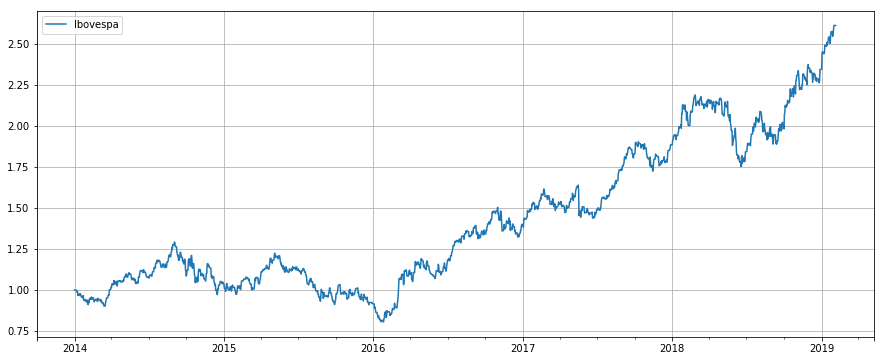

In [112]:
portfolio = (allocations * df_norm).sum(axis=1)

portfolio = portfolio.to_frame('Ibovespa')

portfolio.plot(figsize=(15, 6), grid=True)

In [234]:
# Log returns

returns = get_logs(df_norm)

returns.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BRAP4,BRDT3,BRFS3,BRKM5,...,SMLS3,SUZB3,TAEE3,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
2014-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2014-01-03,-0.021343,0.009122,0.010312,-0.022596,-0.003601,-0.021868,-0.003386,0.0,-0.028165,0.026162,...,0.050120,0.0,0.0,0.103203,-0.005839,0.028424,-0.021775,0.031125,0.0,-0.009440
2014-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2014-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2014-01-06,-0.013310,-0.025289,-0.014686,0.006771,0.008621,-0.014274,-0.009086,0.0,0.001561,-0.018899,...,-0.022559,0.0,0.0,-0.001692,-0.015599,0.019716,0.001082,-0.006148,0.0,0.005405


In [235]:
# Mean of returns

mu = returns.values.mean(axis=0)

mu

array([ 1.12891532e-04,  6.92628325e-04,  5.61730004e-04,  4.71168884e-04,
        6.27615858e-04,  2.98263901e-04,  2.59275404e-04,  2.99305152e-04,
       -3.51725932e-04,  6.68260268e-04,  1.73283495e-04,  7.37328139e-04,
        2.60496685e-05, -9.59327002e-05,  1.95527299e-04,  2.49764445e-04,
       -8.22680094e-05,  8.21107921e-04,  1.73748364e-04,  3.68253953e-05,
        4.55032609e-04,  1.05848171e-03,  9.01257971e-04,  2.87419801e-05,
        4.33265322e-04,  7.75981763e-04,  3.42639662e-04,  6.85533573e-04,
       -3.16540845e-05, -5.65493263e-04,  4.83746242e-04,  3.64451456e-04,
        4.17001284e-04,  6.06773948e-04,  6.07752372e-04,  3.34627607e-04,
        6.01458854e-04,  2.39245133e-04,  3.95064450e-04,  0.00000000e+00,
        9.12133740e-04,  1.78114430e-03,  2.73239162e-04,  4.44866168e-04,
        3.90659338e-04,  1.75758658e-04, -1.15624759e-05,  3.69089812e-04,
        2.89069075e-04, -2.24114442e-05,  7.92232627e-04,  2.26042821e-04,
        7.43835054e-04,  

In [236]:
# Number of assets
num_assets = df_norm.shape[1]

print(num_assets)

65


In [238]:
# Covariance matrix
P = get_covariance(returns)

P

array([[1.26156939e-04, 8.22327962e-05, 9.31788385e-05, ...,
        5.22818778e-05, 2.82390397e-05, 4.85494910e-05],
       [8.22327962e-05, 3.15498492e-04, 2.66383083e-04, ...,
        9.16135704e-05, 6.92016189e-05, 6.97600638e-05],
       [9.31788385e-05, 2.66383083e-04, 5.91923779e-04, ...,
        1.34112022e-04, 1.46274795e-04, 9.38154905e-05],
       ...,
       [5.22818778e-05, 9.16135704e-05, 1.34112022e-04, ...,
        1.80198014e-04, 5.92037216e-05, 5.73448200e-05],
       [2.82390397e-05, 6.92016189e-05, 1.46274795e-04, ...,
        5.92037216e-05, 1.67205960e-03, 4.20611023e-05],
       [4.85494910e-05, 6.97600638e-05, 9.38154905e-05, ...,
        5.73448200e-05, 4.20611023e-05, 2.02097759e-04]])

7.257475309223806e-06


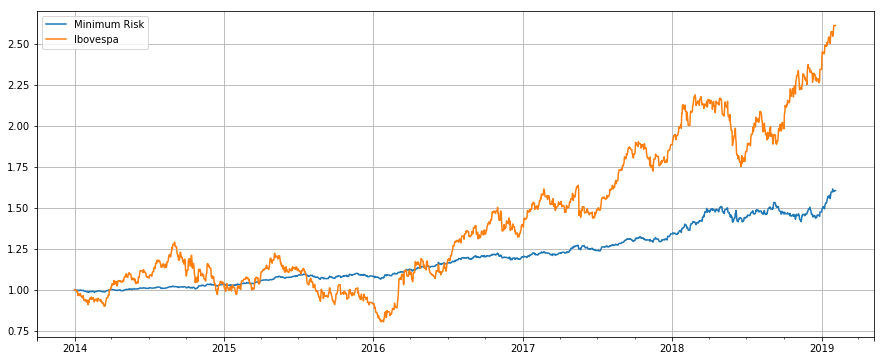

In [239]:
x = cvx.Variable(num_assets)

# Risk x.T * P * x
risk = cvx.quad_form(x, P)

# function = cvx.Minimize(-mu.T * x + scale * risk)
func = cvx.Minimize(risk)

# constraints = [x >= 0.05, x <= 0.45, sum(x) == 1]
min_alloc = 1/num_assets
constraints = [x >=0.0, x <= 0.5, sum(x) == 1.0]

problem = cvx.Problem(func, constraints)

print(problem.solve(solver=cvx.OSQP, eps_abs=10**-5, eps_rel=10**-5))
# print(x.value)

min_var = (x.value * df_norm).sum(axis=1)

min_var = min_var.to_frame('Minimum Risk')

min_var = min_var.join(portfolio, how='left')

min_var.plot(figsize=(15, 6), grid=True)


-0.0002488140160150021


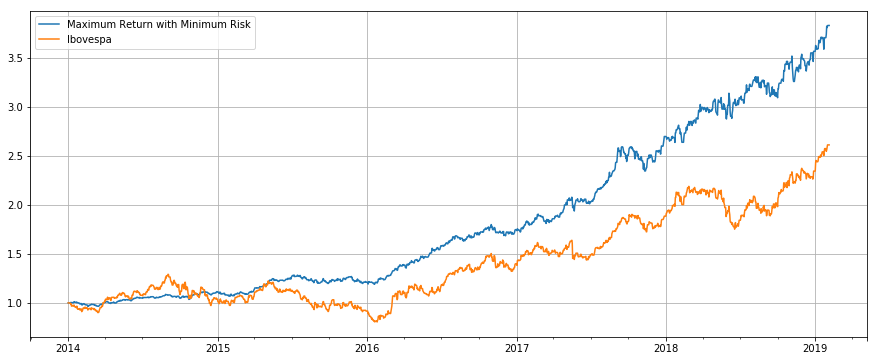

In [240]:
x = cvx.Variable(num_assets)

# Risk x.T * P * x
risk = cvx.quad_form(x, P)

scale = 10

func = cvx.Minimize(-mu.T * x + scale * risk)

constraints = [x >=0.0, x <= 0.5, sum(x) == 1.0]

problem = cvx.Problem(func, constraints)

print(problem.solve(solver=cvx.OSQP, eps_abs=10**-5, eps_rel=10**-5))
# print(x.value)

max_ret_min_risk = (x.value * df_norm).sum(axis=1)

max_ret_min_risk = max_ret_min_risk.to_frame('Maximum Return with Minimum Risk')

max_ret_min_risk = max_ret_min_risk.join(portfolio, how='left')

max_ret_min_risk.plot(figsize=(15, 6), grid=True)


0.00014017377411627518


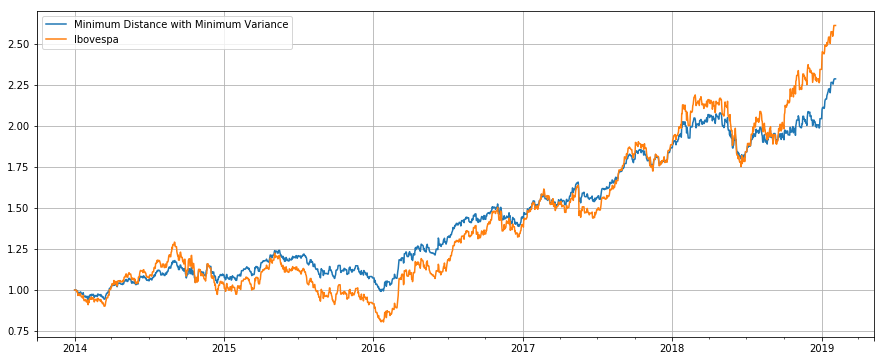

In [241]:
x = cvx.Variable(num_assets)

# Risk x.T * P * x
risk = cvx.quad_form(x, P)

scale = 0.0005

distance = cvx.norm(x - allocations, p=2)

func = cvx.Minimize(risk + scale * distance)

# constraints = [x >= 0.05, x <= 0.45, sum(x) == 1]

constraints = [x >=0.0, sum(x) == 1.0]

problem = cvx.Problem(func, constraints)

# print(problem.solve(solver=cvx.OSQP, eps_abs=10**-5, eps_rel=10**-5))
print(problem.solve())
# print(x.value)

min_dist_min_var = (x.value * df_norm).sum(axis=1)

min_dist_min_var = min_dist_min_var.to_frame('Minimum Distance with Minimum Variance')

min_dist_min_var = min_dist_min_var.join(portfolio, how='left')

min_dist_min_var.plot(figsize=(15, 6), grid=True)


0.0009648616820281339


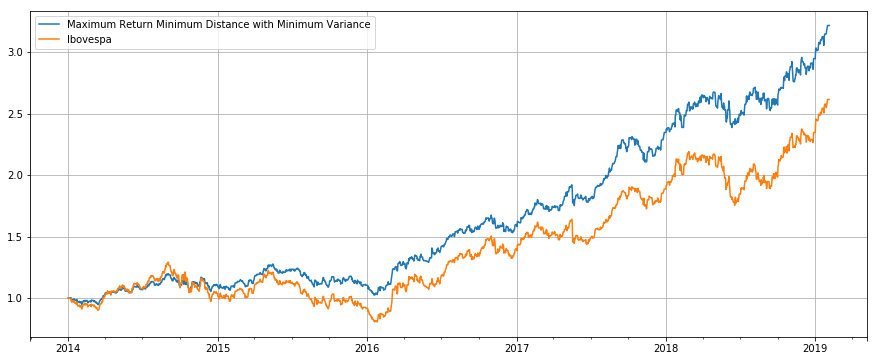

In [242]:
x = cvx.Variable(num_assets)

# Risk x.T * P * x
risk = cvx.quad_form(x, P)

scale_1 = 10
scale_2 = 0.005

distance = cvx.norm(x - allocations, p=2)

func = cvx.Minimize(-mu.T * x + scale_1 * risk + scale_2 * distance)

# constraints = [x >= 0.05, x <= 0.45, sum(x) == 1]

constraints = [x >=0.0, sum(x) == 1.0]

problem = cvx.Problem(func, constraints)

print(problem.solve())
# print(x.value)

max_ret_min_dist_min_var = (x.value * df_norm).sum(axis=1)

max_ret_min_dist_min_var = max_ret_min_dist_min_var.to_frame('Maximum Return Minimum Distance with Minimum Variance')

max_ret_min_dist_min_var = max_ret_min_dist_min_var.join(portfolio, how='left')

max_ret_min_dist_min_var.plot(figsize=(15, 6), grid=True)

0.012035890135292736


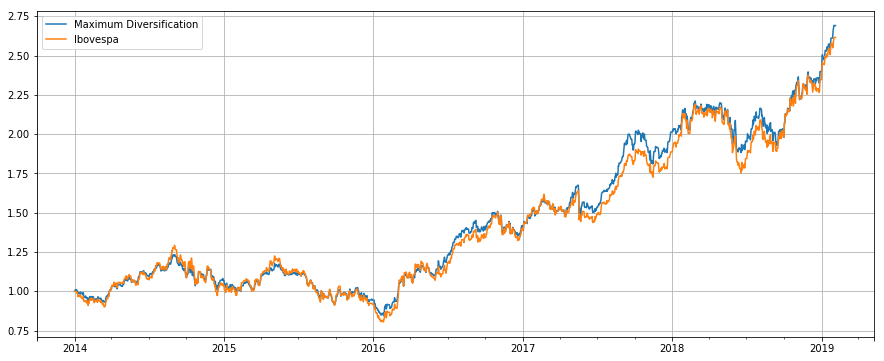

In [243]:
x = cvx.Variable(num_assets)

# Risk x.T * P * x
risk = cvx.quad_form(x, P)

scale_1 = 0.1

magnitude = cvx.norm(x, p=2)

func = cvx.Minimize(-mu.T * x + scale_1 * magnitude)

constraints = [x >=0.0, sum(x) == 1.0]

problem = cvx.Problem(func, constraints)

print(problem.solve())
# print(x.value)

max_diversification = (x.value * df_norm).sum(axis=1)

max_diversification = max_diversification.to_frame('Maximum Diversification')

max_diversification = max_diversification.join(portfolio, how='left')

max_diversification.plot(figsize=(15, 6), grid=True)

6.417334812953691e-06


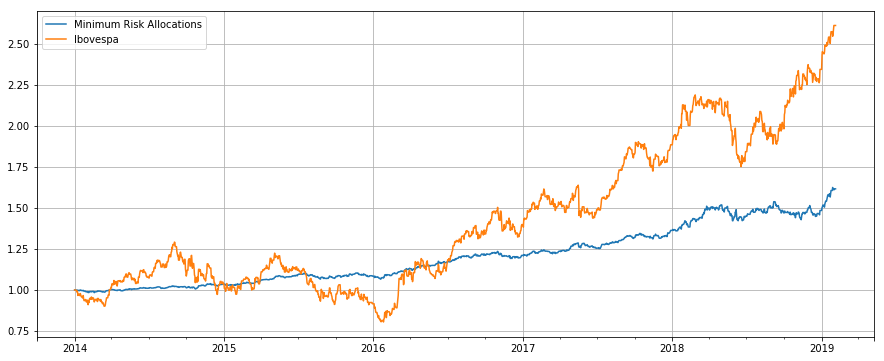

In [180]:
x = cvx.Variable(num_assets)

# Risk x.T * P * x
risk = cvx.quad_form(x - mu, P)

# function = cvx.Minimize(-mu.T * x + scale * risk)
func = cvx.Minimize(risk)

# constraints = [x >= 0.05, x <= 0.45, sum(x) == 1]
min_alloc = 1/num_assets
constraints = [x >=0.0, x <= 0.5, sum(x) == 1.0]

problem = cvx.Problem(func, constraints)

print(problem.solve(solver=cvx.OSQP, eps_abs=10**-5, eps_rel=10**-5))
# print(x.value)

min_var_allocations = (x.value * df_norm).sum(axis=1)

min_var_allocations = min_var_allocations.to_frame('Minimum Risk Allocations')

min_var_allocations = min_var_allocations.join(portfolio, how='left')

min_var_allocations.plot(figsize=(15, 6), grid=True)


In [181]:
# ToDO: Buscar outras modelagens de risco

In [295]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):

    return pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)

def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
    
    return pd.DataFrame(pca.transform(returns), factor_return_indices, factor_return_columns)

def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
    
    common_returns_ = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns.index, returns.columns)
    
    residuals_ = (returns - common_returns_)
    
    return pd.DataFrame(np.diag(np.var(residuals_))*ann_factor, returns.columns, returns.columns)

def factor_cov_matrix(factor_returns, ann_factor):

    return np.diag(factor_returns.var(axis=0, ddof=1)*ann_factor)

def fit_pca(returns, num_factor_exposures, svd_solver):

    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    pca.fit(returns)
    
    return pca



In [296]:
class RiskModel(object):
    def __init__(self, returns, ann_factor, num_factor_exposures, pca):

        self.factor_betas_ = factor_betas(pca, returns.columns.values, np.arange(num_factor_exposures))
        self.factor_returns_ = factor_returns(pca, returns, returns.index, np.arange(num_factor_exposures))
        self.factor_cov_matrix_ = factor_cov_matrix(self.factor_returns_, ann_factor)
        self.idiosyncratic_var_matrix_ = idiosyncratic_var_matrix(returns, self.factor_returns_, self.factor_betas_, ann_factor)



In [297]:
# Set the annualized factor
ann_factor = 1

# Set the number of factor exposures (principal components) for the PCA algorithm
num_factor_exposures = 20

# Set the svd solver for the PCA algorithm
svd_solver = 'full'

# Fit the PCA Model using the fit_pca() fucntion 
pca = fit_pca(returns, num_factor_exposures, svd_solver)

# Create a RiskModel object
rm = RiskModel(returns, ann_factor, num_factor_exposures, pca)

In [298]:
rm.factor_betas_.shape

(65, 20)

In [299]:
rm.factor_cov_matrix_.shape

(20, 20)

In [300]:
rm.idiosyncratic_var_matrix_.shape

(65, 65)

In [301]:
P_prime = (rm.factor_betas_.dot(rm.factor_cov_matrix_)).dot(rm.factor_betas_.T) + rm.idiosyncratic_var_matrix_

7.4329811645675905e-06


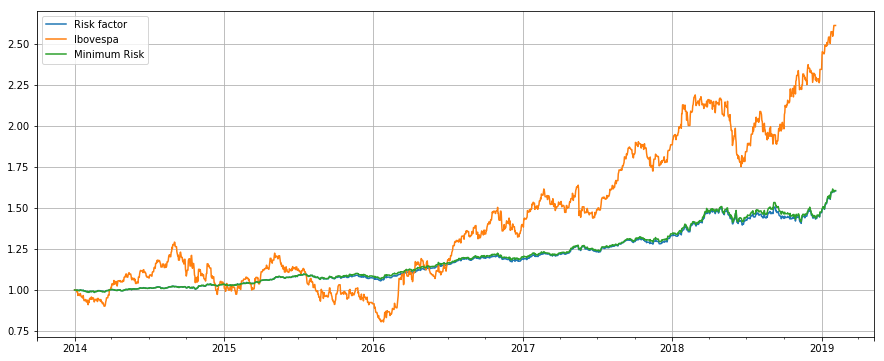

In [302]:
x = cvx.Variable(num_assets)

# Risk x.T * P_prime * x
risk = cvx.quad_form(x, P_prime)

# function = cvx.Minimize(-mu.T * x + scale * risk)
func = cvx.Minimize(risk)

# constraints = [x >= 0.05, x <= 0.45, sum(x) == 1]
min_alloc = 1/num_assets
constraints = [x >=0.0, x <= 0.5, sum(x) == 1.0]

problem = cvx.Problem(func, constraints)

print(problem.solve(solver=cvx.OSQP, eps_abs=10**-5, eps_rel=10**-5))

risk_factor = (x.value * df_norm).sum(axis=1)

risk_factor = risk_factor.to_frame('Risk factor')

risk_factor = risk_factor.join(portfolio, how='left')
risk_factor = risk_factor.join(min_var[['Minimum Risk']], how='left')

risk_factor.plot(figsize=(15, 6), grid=True)
